In [24]:
import json
import matplotlib.pyplot as plt
import glob
import pandas as pd
import os
import numpy as np
import math

results_path = './results/session4/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['graphId'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['graphId', 'algorithm', 'initializationTime', 'executionTime', 'totalTime', 'timestamp','V','E'])
results

,graphId,algorithm,initializationTime,executionTime,totalTime,timestamp,V,E
0,BVZ-tsukuba0,parallelbcsr,3.839488,3494.388184,3498.227539,20240924174421,110594,514483
1,BVZ-tsukuba0,parallelbcsr,3.786592,3465.621338,3469.407959,20240924180912,110594,514483
2,BVZ-tsukuba0,parallelbcsr,5.524384,3492.008545,3497.532715,20240924183403,110594,514483
3,BVZ-tsukuba0,parallelbcsr,3.937952,3473.009033,3476.947021,20240924185852,110594,514483
4,BVZ-tsukuba0,parallelbcsr,3.861728,3484.645508,3488.507324,20240924192342,110594,514483
...,...,...,...,...,...,...,...,...
485,graph9b,parallelbcsr,6.055104,88.365181,94.420288,20240924201124,100000,1152482
486,graph9b,parallelbcsr,3.904096,97.577888,101.481987,20240924203615,100000,1152482
487,graph9b,parallelbcsr,4.007136,102.441437,106.448578,20240924210105,100000,1152482
488,graph9b,parallelbcsr,3.896576,85.387970,89.284546,20240924212554,100000,1152482


In [25]:
agg_results = results.groupby(['graphId', 'algorithm', 'V', 'E']).agg({'initializationTime': ['mean', 'std', 'min', 'max'], 'executionTime': ['mean', 'std', 'min', 'max'], 'totalTime': ['mean', 'std', 'min', 'max']}).reset_index()
agg_results.columns = ['graphId', 'algorithm', 'V', 'E', 'initTime_mean', 'initTime_std', 'initTime_min', 'initTime_max', 'execTime_mean', 'execTime_std', 'execTime_min', 'execTime_max', 'totTime_mean', 'totTime_std', 'totTime_min', 'totTime_max']
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
0,BVZ-tsukuba0,parallelbcsr,110594,514483,4.350400,0.788419,3.786592,5.524384,3483.511621,16.952748,3465.621338,3510.003662,3487.861987,17.171677,3469.407959,3515.479004
1,BVZ-tsukuba1,parallelbcsr,110594,526213,4.310819,0.944187,3.654144,6.039744,3934.162964,408.467332,3525.595459,4645.917480,3938.473804,408.396189,3529.272705,4649.663086
2,BVZ-tsukuba10,parallelbcsr,110594,516529,3.951139,0.586825,3.650944,5.569280,3588.131567,86.690939,3460.932129,3781.811768,3592.082666,86.670070,3464.605957,3785.565918
3,BVZ-tsukuba11,parallelbcsr,110594,510446,4.166438,0.721877,3.729632,5.599584,3946.372021,89.162477,3800.231689,4059.333496,3950.538452,89.517961,3804.076904,4064.795654
4,BVZ-tsukuba12,parallelbcsr,110594,510816,4.307344,0.967136,3.713024,6.574752,3794.751611,15.455373,3779.043945,3823.239502,3799.058936,15.807138,3782.857178,3827.189941
5,BVZ-tsukuba13,parallelbcsr,110594,551616,3.050902,0.633033,2.741920,4.599232,0.330624,0.037244,0.297568,0.404352,3.381526,0.668407,3.039488,5.003584
6,BVZ-tsukuba14,parallelbcsr,110594,515315,4.460595,0.991482,3.746336,6.330624,3697.842847,241.230324,3613.396973,4384.203125,3702.303394,241.068322,3617.357910,4388.194824
7,BVZ-tsukuba15,parallelbcsr,110594,518994,4.497664,0.847950,3.920864,5.761888,3754.015869,25.668075,3722.469482,3786.763428,3758.513525,25.751892,3726.418701,3792.451660
8,BVZ-tsukuba2,parallelbcsr,110594,508272,4.085072,0.687562,3.690432,5.461984,3615.612915,21.013985,3572.530518,3645.045898,3619.697998,20.726332,3577.840820,3648.833008
9,BVZ-tsukuba3,parallelbcsr,110594,506721,3.919552,0.494229,3.673472,5.310176,3778.049097,6.945656,3767.160156,3787.178223,3781.968652,6.825425,3771.076172,3790.905762


In [26]:
agg_results = agg_results.sort_values(by=['V'])
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
18,graph1,serial,4,5,0.003300,0.001160,0.002000,0.006000,0.002900,0.001197,0.002000,0.006000,0.006600,0.002547,0.004000,0.013000
17,graph1,parallelbcsr,4,5,0.139440,0.014205,0.112704,0.154336,1.828726,0.369901,1.332928,2.266624,1.968166,0.376067,1.456448,2.420736
16,graph1,parallel,4,5,0.135043,0.014936,0.110944,0.163712,0.300595,0.045806,0.209152,0.344224,0.435638,0.059493,0.323392,0.507936
21,graph2,serial,6,8,0.004000,0.003018,0.002000,0.012000,0.005400,0.003893,0.003000,0.016000,0.010000,0.006912,0.006000,0.029000
20,graph2,parallelbcsr,6,8,0.147901,0.006271,0.135136,0.160000,1.553101,0.237885,1.290112,1.846016,1.701002,0.236971,1.434912,1.995488
19,graph2,parallel,6,8,0.145162,0.022129,0.098400,0.166176,0.283594,0.054469,0.176032,0.317984,0.428755,0.076249,0.274432,0.484160
24,graph3,serial,100,459,0.034800,0.006215,0.026000,0.042000,10.121300,1.320161,8.208000,10.993000,10.156600,1.326112,8.235000,11.030000
27,graph3b,serial,100,918,0.036200,0.005029,0.026000,0.043000,1.040600,0.115155,0.802000,1.108000,1.077200,0.119699,0.829000,1.149000
26,graph3b,parallelbcsr,100,459,0.128288,0.012790,0.109152,0.143808,1.375373,0.044373,1.294720,1.464352,1.503661,0.048807,1.403872,1.581504
25,graph3b,parallel,100,918,0.204566,0.028442,0.169792,0.236800,0.766758,0.071852,0.685504,0.842528,0.971325,0.097660,0.856864,1.077312


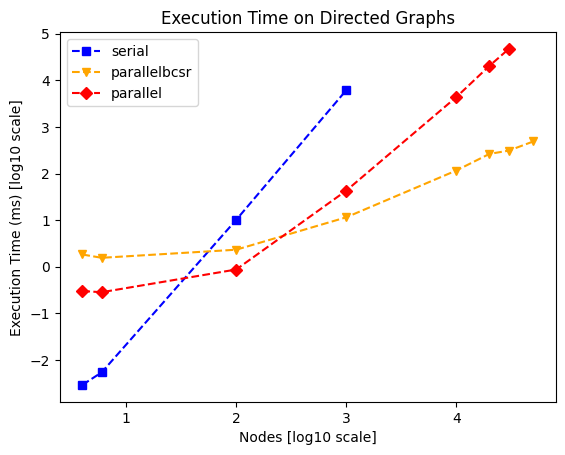

In [27]:
plot_style = {'serial': {'linestyle': 'dashed', 'color': 'blue', 'marker': 's'},
              'parallel': {'linestyle': 'dashed', 'color': 'red', 'marker': 'D'},
              'parallelbcsr': {'linestyle': 'dashed', 'color': 'orange', 'marker': 'v'}
              }

# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b') and not contains 'tsukuba'
agg_results_directed = agg_results[(~agg_results['graphId'].str.endswith('b')) & (~agg_results['graphId'].str.contains('tsukuba'))]

# Line plot
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Directed Graphs')
plt.legend()
#plt.xticks(rotation=45)
plt.show()

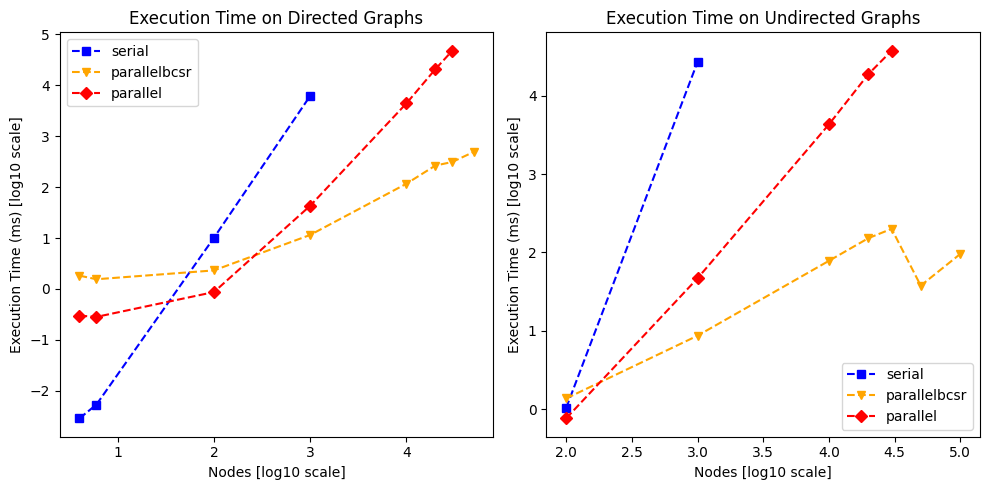

In [28]:
# Plot execution time for each algorithm on directed graphs (graphId not ends with 'b') and plot execution time for each algorithm on undirected graphs (graphId ends with 'b') 
agg_results_directed = agg_results[(~agg_results['graphId'].str.endswith('b')) & (~agg_results['graphId'].str.contains('tsukuba'))]
agg_results_undirected = agg_results[agg_results['graphId'].str.endswith('b')]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
for algorithm in agg_results_directed['algorithm'].unique():
    data = agg_results_directed[agg_results_directed['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Directed Graphs')
plt.legend()
#plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
for algorithm in agg_results_undirected['algorithm'].unique():
    data = agg_results_undirected[agg_results_undirected['algorithm'] == algorithm]
    plt.plot(np.log10(data['V']), np.log10(data['execTime_mean']), label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Nodes [log10 scale]')
plt.ylabel('Execution Time (ms) [log10 scale]')
plt.title('Execution Time on Undirected Graphs')
plt.legend()
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


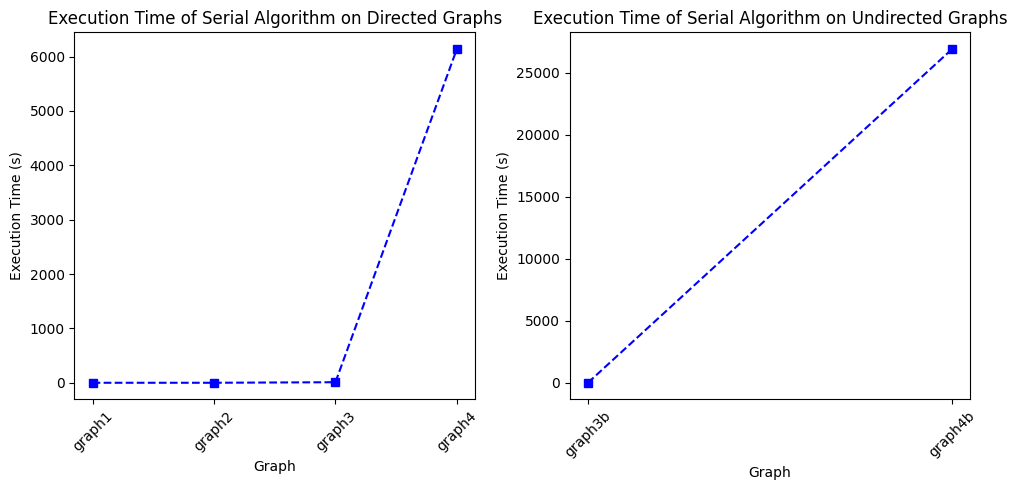

In [29]:
# Plot execution time of serial algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'serial') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'serial') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Serial Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='serial', linestyle=plot_style['serial']['linestyle'], color=plot_style['serial']['color'], marker=plot_style['serial']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Serial Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

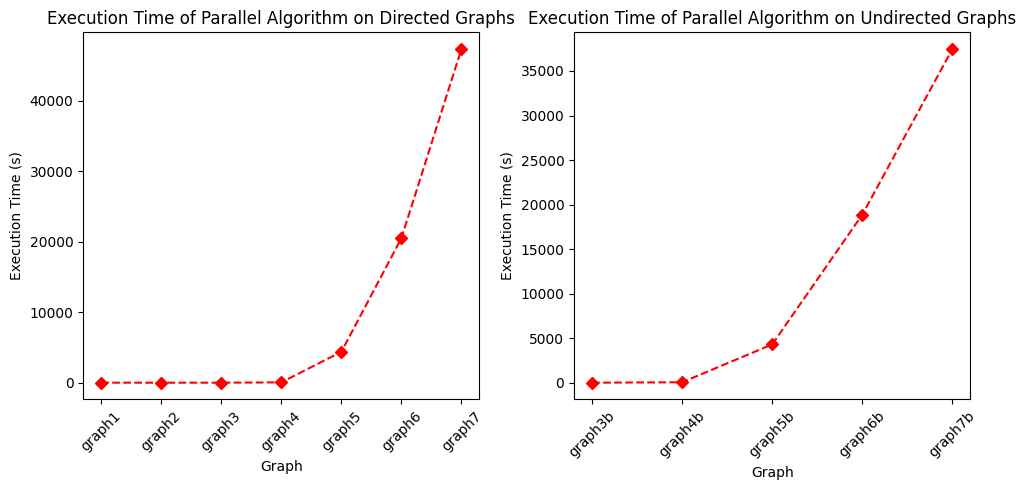

In [30]:
# Plot execution time of parallel algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallel') & (~agg_results['graphId'].str.endswith('b'))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallel') & (agg_results['graphId'].str.endswith('b'))]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(agg_results_directed['graphId'], agg_results_directed['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
plt.plot(agg_results_undirected['graphId'], agg_results_undirected['execTime_mean'], label='parallel', linestyle=plot_style['parallel']['linestyle'], color=plot_style['parallel']['color'], marker=plot_style['parallel']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

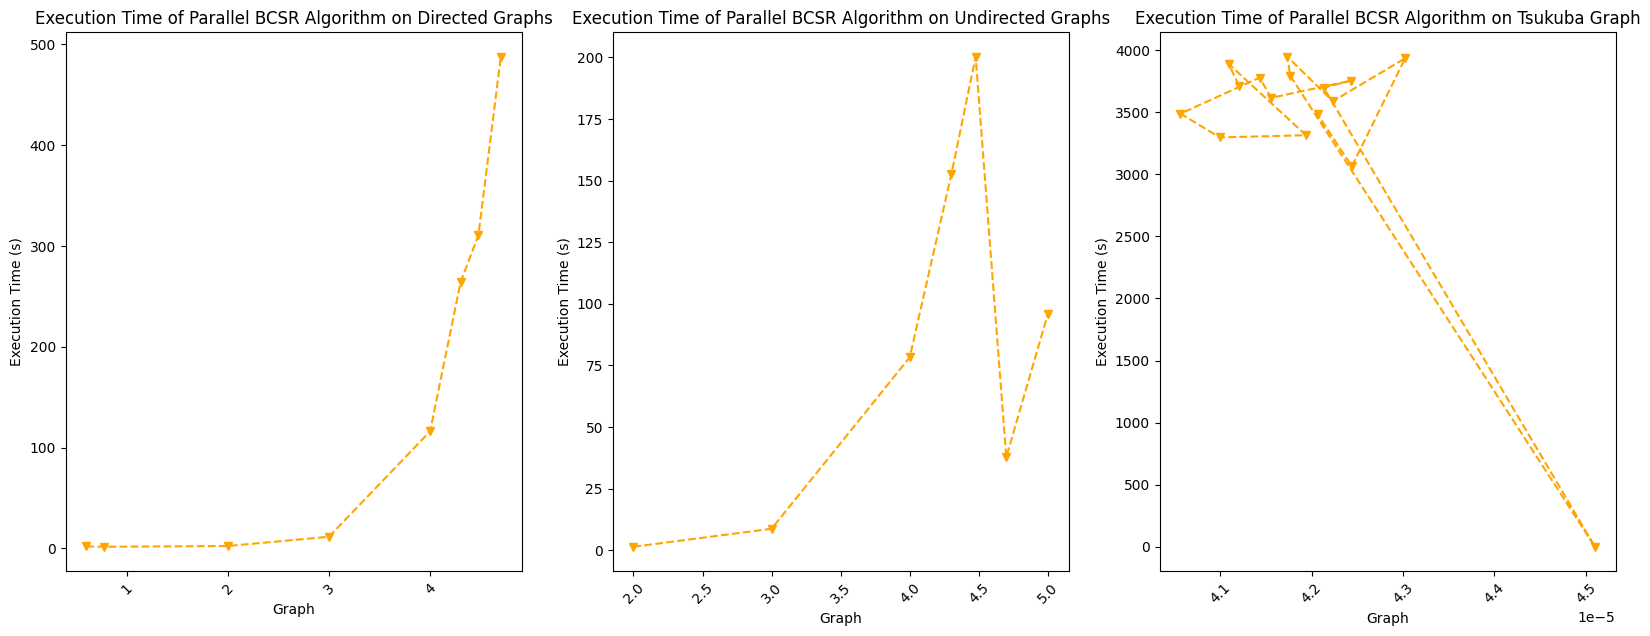

In [31]:
# Plot execution time of parallelbcsr algorithm for directed and undirected graphs separately
agg_results_directed = agg_results[(agg_results['algorithm'] == 'parallelbcsr') & (~agg_results['graphId'].str.endswith('b') & (~agg_results['graphId'].str.contains('tsukuba')))]
agg_results_undirected = agg_results[(agg_results['algorithm'] == 'parallelbcsr') & (agg_results['graphId'].str.endswith('b') & (~agg_results['graphId'].str.contains('tsukuba')))]
agg_results_directed_tsukuba = agg_results[(agg_results['algorithm'] == 'parallelbcsr') & (agg_results['graphId'].str.contains('tsukuba'))]
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.plot(np.log10(agg_results_directed['V']), agg_results_directed['execTime_mean'], label='parallelbcsr', linestyle=plot_style['parallelbcsr']['linestyle'], color=plot_style['parallelbcsr']['color'], marker=plot_style['parallelbcsr']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Directed Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 3, 2)
plt.plot(np.log10(agg_results_undirected['V']), agg_results_undirected['execTime_mean'], label='parallelbcsr', linestyle=plot_style['parallelbcsr']['linestyle'], color=plot_style['parallelbcsr']['color'], marker=plot_style['parallelbcsr']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Undirected Graphs')
plt.xticks(rotation=45)
plt.subplot(1, 3, 3)
density = agg_results_directed_tsukuba['E'] / (agg_results_directed_tsukuba['V'] * (agg_results_directed_tsukuba['V'] -1))
plt.plot(density, agg_results_directed_tsukuba['execTime_mean'], label='parallelbcsr', linestyle=plot_style['parallelbcsr']['linestyle'], color=plot_style['parallelbcsr']['color'], marker=plot_style['parallelbcsr']['marker'])
plt.xlabel('Graph')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Parallel BCSR Algorithm on Tsukuba Graph')
plt.xticks(rotation=45)
plt.show()

In [32]:
results_path = './results/session5_density1K/'
files = glob.glob(results_path + '*.json')
results = []

for file in files:
    with open(file) as f:
        filename = os.path.basename(file)
        splitted_filename = filename.split('_')
        graph = splitted_filename[0]
        algorithm = splitted_filename[1]
        timestamp = splitted_filename[3].split('.')[0] if len(splitted_filename) > 3 else ''
        content = json.load(f)
        content['graphId'] = graph
        content['algorithm'] = algorithm
        content['timestamp'] = timestamp
        results.append(content)

results = pd.DataFrame(results, columns=['graphId', 'algorithm', 'initializationTime', 'executionTime', 'totalTime', 'timestamp', 'V', 'E'])
results

,graphId,algorithm,initializationTime,executionTime,totalTime,timestamp,V,E
0,graphP01,parallelbcsr,0.839680,27.322336,28.162016,20240925145859,1000,99554
1,graphP01,parallelbcsr,0.809152,25.451872,26.261024,20240925145928,1000,99554
2,graphP01,parallelbcsr,0.573376,20.930529,21.503904,20240925145958,1000,99554
3,graphP01,parallelbcsr,0.801728,20.649824,21.451551,20240925150027,1000,99554
4,graphP01,parallelbcsr,0.802240,27.312449,28.114689,20240925150058,1000,99554
...,...,...,...,...,...,...,...,...
195,graphP1,parallel,6.672992,71.279808,77.952797,20240925145831,1000,999000
196,graphP1,parallel,5.273440,69.921219,75.194656,20240925145836,1000,999000
197,graphP1,parallel,6.729664,71.301666,78.031326,20240925145840,1000,999000
198,graphP1,parallel,5.264832,70.049599,75.314430,20240925145844,1000,999000


In [33]:
agg_results = results.groupby(['graphId', 'algorithm', 'V', 'E']).agg({'initializationTime': ['mean', 'std', 'min', 'max'], 'executionTime': ['mean', 'std', 'min', 'max'], 'totalTime': ['mean', 'std', 'min', 'max']}).reset_index()
agg_results.columns = ['graphId', 'algorithm', 'V', 'E', 'initTime_mean', 'initTime_std', 'initTime_min', 'initTime_max', 'execTime_mean', 'execTime_std', 'execTime_min', 'execTime_max', 'totTime_mean', 'totTime_std', 'totTime_min', 'totTime_max']
agg_results

,graphId,algorithm,V,E,initTime_mean,initTime_std,initTime_min,initTime_max,execTime_mean,execTime_std,execTime_min,execTime_max,totTime_mean,totTime_std,totTime_min,totTime_max
0,graphP01,parallel,1000,99554,7.155939,0.325857,6.624928,7.617472,62.029853,0.147445,61.781345,62.213535,69.185791,0.457531,68.406273,69.831009
1,graphP01,parallelbcsr,1000,99554,0.795779,0.080825,0.573376,0.865440,24.588775,3.218119,20.514273,27.548927,25.384554,3.246836,21.379711,28.384256
2,graphP02,parallel,1000,199816,8.634109,0.184089,8.451808,8.929824,70.061117,0.132858,69.874207,70.291489,78.695226,0.303710,78.363266,79.202141
3,graphP02,parallelbcsr,1000,199816,1.141910,0.019488,1.119328,1.179552,51.851907,6.653040,43.418530,58.006527,52.993818,6.655608,44.545120,59.126270
4,graphP03,parallel,1000,300122,9.775590,0.451460,8.539840,10.226368,74.784238,0.383032,73.720993,75.089119,84.559828,0.830589,82.260834,85.315491
5,graphP03,parallelbcsr,1000,300122,1.484509,0.238849,1.032928,1.777728,81.054671,0.661948,79.779106,81.801247,82.539181,0.876287,80.852638,83.370018
6,graphP04,parallel,1000,399515,11.377632,0.429894,10.223968,11.709504,77.706729,0.462834,76.591644,78.086845,89.084361,0.861327,86.815613,89.752129
7,graphP04,parallelbcsr,1000,399515,1.763552,0.329160,1.228896,2.228224,97.488569,1.657057,93.190880,99.327965,99.252122,1.923357,94.423805,101.556190
8,graphP05,parallel,1000,499792,12.417878,0.625809,10.753440,13.126336,79.506467,0.510693,78.185860,80.100800,91.924345,1.130002,88.939293,93.227135
9,graphP05,parallelbcsr,1000,499792,1.655856,0.377609,1.329312,2.144416,109.659698,1.025076,107.774017,110.667389,111.315555,1.312690,109.133888,112.795135


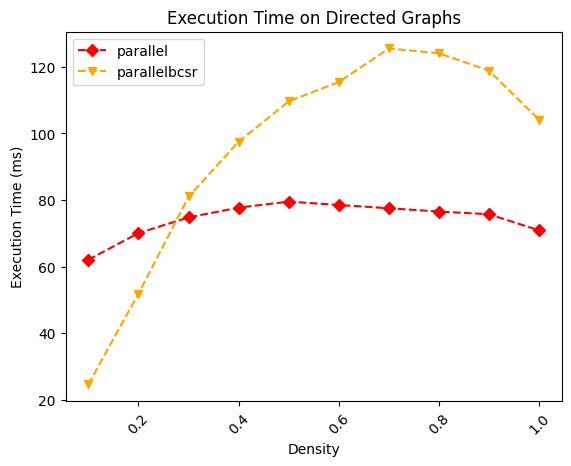

In [34]:
plot_style = {'serial': {'linestyle': 'dashed', 'color': 'blue', 'marker': 's'},
              'parallel': {'linestyle': 'dashed', 'color': 'red', 'marker': 'D'},
              'parallelbcsr': {'linestyle': 'dashed', 'color': 'orange', 'marker': 'v'}
              }

# Line plot
for algorithm in agg_results['algorithm'].unique():
    data = agg_results[agg_results['algorithm'] == algorithm]
    density = data['E'] / (data['V'] * (data['V'] -1))
    plt.plot(density, data['execTime_mean'], label=algorithm, linestyle=plot_style[algorithm]['linestyle'], color=plot_style[algorithm]['color'], marker=plot_style[algorithm]['marker'])
plt.xlabel('Density')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time on Directed Graphs')
plt.legend()
plt.xticks(rotation=45)
plt.show()